## Preparing the tools 

■  We are going to use pandas, matplotlib NumPy for data analysis and manipulation.

In [97]:
# Import all the tolls we need

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear inside the notebook
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data 

In [98]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions are you trying to solve ? 
2. What kind of data do we have and how do we treat different types ? 
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ? 
5. How can you add, change or remove features to get more out of your data ? 

In [99]:
# Let's find out how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

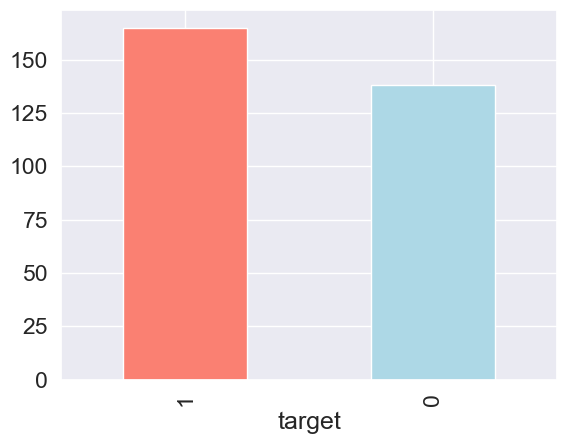

In [100]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [102]:
# Are there any missing values ? 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [103]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex.

In [104]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [105]:
# Compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


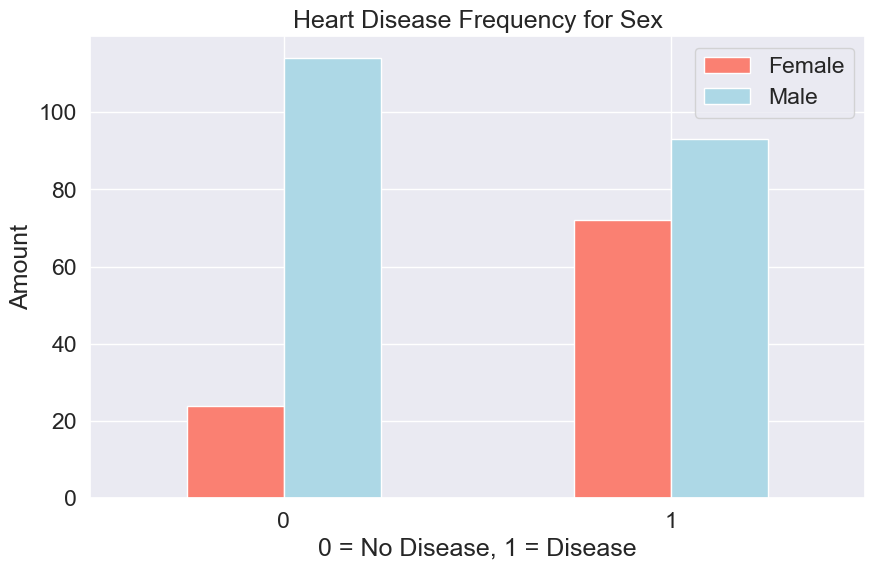

In [106]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10, 6), 
                                   color = ["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

### Age vs. Max Heart Rate (thalac) for Heart Disease

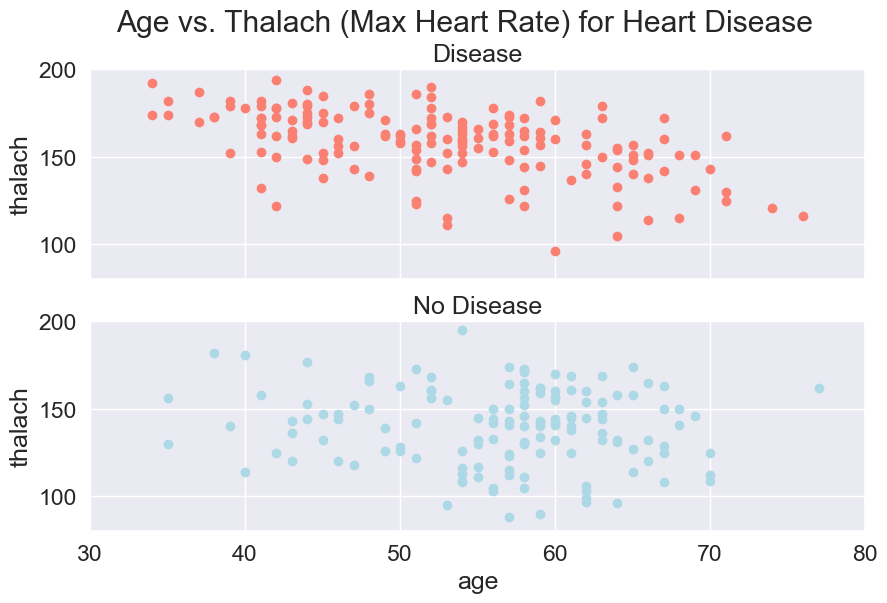

In [107]:
# Let's create a figure 
fig, (ax0, ax1) = plt.subplots(nrows = 2, 
                               ncols = 1, 
                               sharex = True, 
                               figsize = (10, 6))

# Scatter with positive examples
scatter = ax0.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1], 
            c = "salmon")

ax0.set(title = "Disease", 
        ylabel = "thalach",
        xlim = [30,80], 
        ylim = [80,200])

# Scatter with negative examples
scatter = ax1.scatter(df.age[df.target == 0], 
                      df.thalach[df.target == 0],
                      c = "lightblue")

ax1.set(title = "No Disease", 
        ylabel = "thalach",
        xlabel = "age",
        ylim = [80,200])

plt.suptitle("Age vs. Thalach (Max Heart Rate) for Heart Disease");

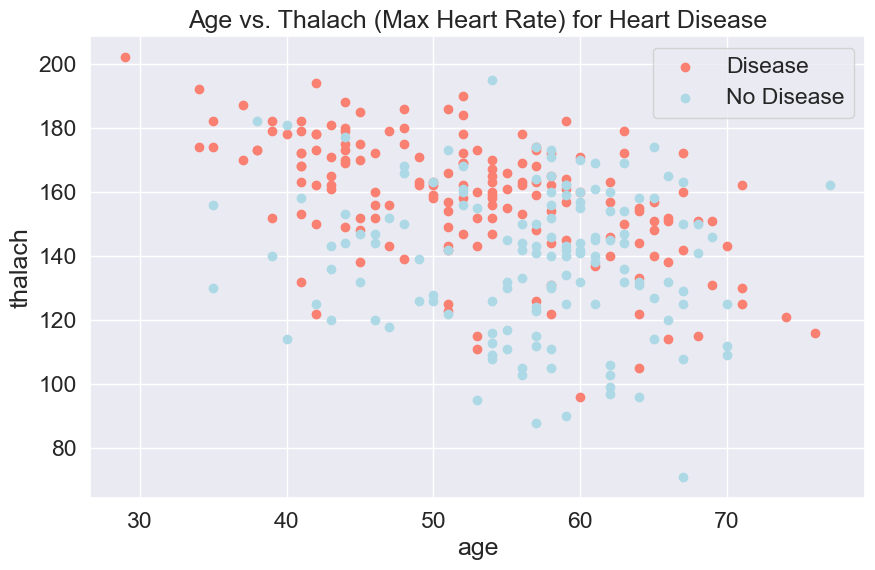

In [108]:
# Let's see them both together

# Create a figure 
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1],
            c = "Salmon")

# Scatter with positive examples
plt.scatter(df.age[df.target == 0], 
            df.thalach[df.target == 0],
            c = "lightblue")

# Add some helpful info 
plt.title("Age vs. Thalach (Max Heart Rate) for Heart Disease")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["Disease", "No Disease"]);

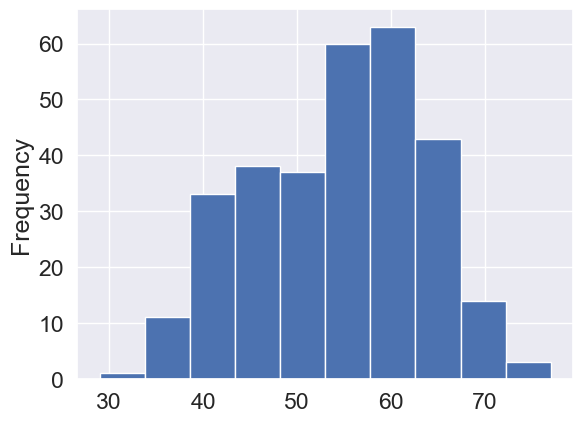

In [109]:
# Check the distributions of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type 

     ■ 0 : Typical angina : chest pain related decrease blood supply to heart 
     
     ■ 1 : Atypical angina : chest pain not related to heart 
     
     ■ 2 : Non-anginal pain : typically esophageal spasms (non heart related)
     
     ■ 3 : Asymptomatic : chest pain not showing signs of disease 

In [110]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


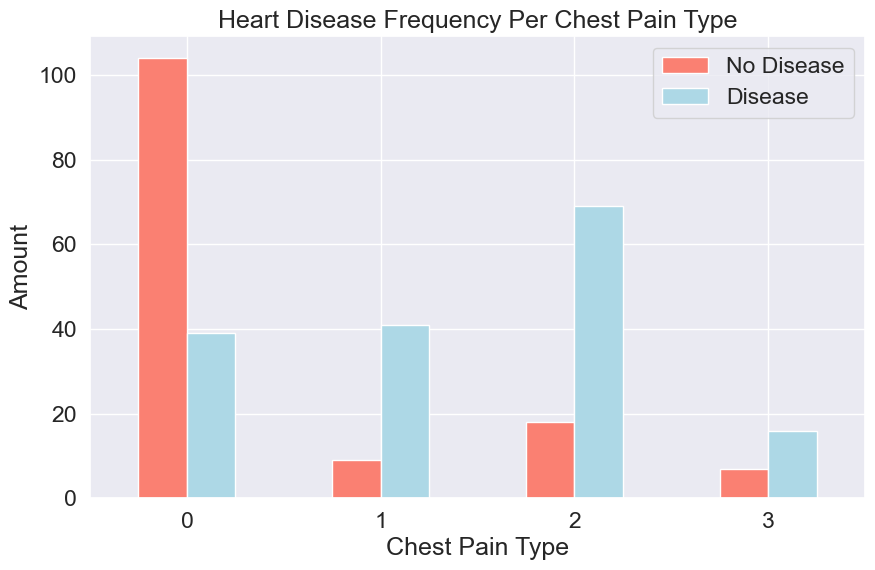

In [111]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                   color  = ["salmon", "lightblue"])

# Add some helpful info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [112]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


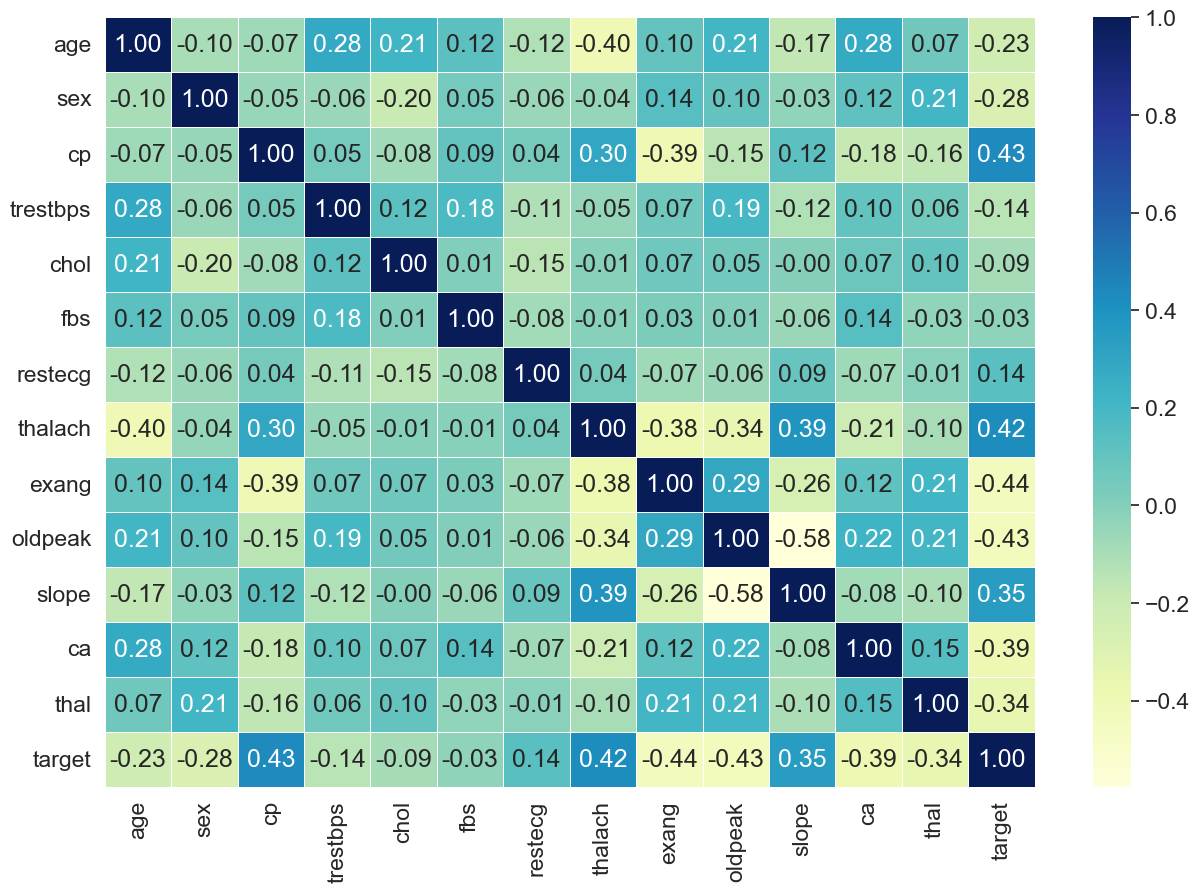

In [113]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot = True, 
                 linewidths = 0.5, 
                 fmt = ".2f", 
                 cmap = "YlGnBu");

### Modelling 

In [114]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
# Split data into X and y 
X = df.drop("target", axis = 1) # All the columns without target column (features)
y = df["target"] # Only target column (label) 

In [116]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [117]:
y 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [118]:
# Split data into train and test sets.
np.random.seed(42)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [119]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [120]:
y_train , len(y_train) # len(y_train) same with len(X_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

■ Now we have got our data split into training and test sets, it's time to build a machine learning model.

* We will train it (find the patterns) on the training set.

* And we will test it (use the patterns) on the test set.

We are going to try 3 different machine learning models : 

1. LogisticRegression
2. K-Nearest Neighbours Classifier
3. Random Forest CLassifier

In [121]:
# Put models in a dictionary 
models = {"Logistic Regression" : LogisticRegression(), 
          "KNN" : KNeighborsClassifier(), 
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : traning labels
    y_test : test labels
    """
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [122]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\abdur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

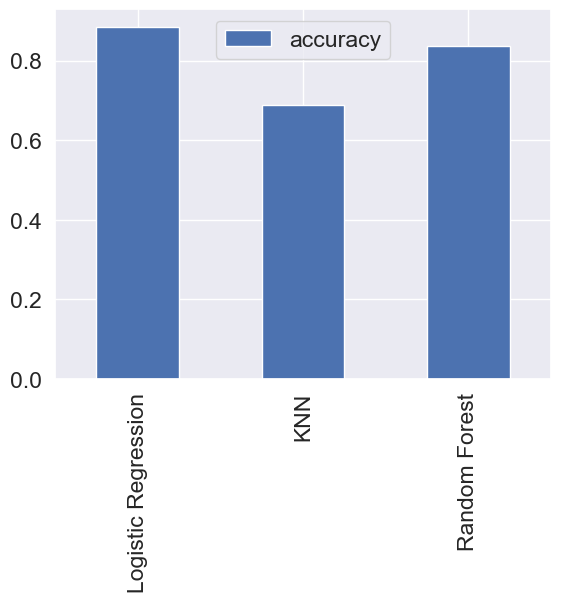

In [123]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

* Now we have got a baseline model ... and we know a model's first predictions aren't always what we should based our next steps off. What should do ?

Let's look at the following :
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning (by hand)

In [124]:
# Let's tune KNN 

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors: 
    knn.set_params(n_neighbors = i)

# Fit the algorithm 
knn.fit(X_train, y_train)

# Update the training scores list 
train_scores.append(knn.score(X_train, y_train))

# Update the test scores list
test_scores.append(knn.score(X_test, y_test))

In [125]:
train_scores

[0.6694214876033058]

In [126]:
test_scores

[0.6557377049180327]

## Hyperparameter Tuning With RandomizedSearchCV

We are going to tune : 
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [127]:
# Create a Hyperparameter Grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4, 20), 
                "solver" : ["liblinear"]}

# Create a Hyperparameter Grid for RandomForestClassifier

rf_grid = {"n_estimators" : np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split" : np.arange(2, 20, 2), 
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [128]:
# Let's tune LogisticRegression

np.random.seed(42)

# Setup hyperparameter search for LogisticRegression

log_reg_model = LogisticRegression()

rs_log_reg = RandomizedSearchCV(estimator = log_reg_model, 
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [129]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [130]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [131]:
# Setup random seed 
np.random.seed(42)

# Setup hyperparameter search for RandomForestClassifier
clf = RandomForestClassifier()

rs_random_forest = RandomizedSearchCV(estimator = clf, 
                                  param_distributions = rf_grid, 
                                  cv = 5, 
                                  n_iter = 20, 
                                  verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [132]:
# Find the best hyperparameters
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [133]:
# Evaluate the randomized search RandomForestClassifer model
rs_random_forest.score(X_test, y_test) # There is a little improvement on our model.

0.8688524590163934

In [134]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameters Tuning using GridSearchCV 

Since our logistic regression model provides the best scores so far, we will try and improve them again using GridSearchCV ...

In [135]:
# Different hyperparameters for our logisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 20), 
                "solver" : ["liblinear"]}

# Setup random seed
np.random.seed(42)

log_reg_model = LogisticRegression()

gs_log_reg = GridSearchCV(estimator = log_reg_model, 
                         param_grid = log_reg_grid, 
                         cv = 5, 
                         verbose = True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [136]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [137]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [138]:
#Different parameters for our RandomForestModel
rf_grid = {"n_estimators" : [50, 100, 200, 500], 
           "max_depth": [None, 3], 
           "min_samples_split" : [6], 
           "min_samples_leaf" : [2,4]}

# Setup the random seed
np.random.seed(42)

clf = RandomForestClassifier()

gs_random_forest = GridSearchCV(estimator = clf, 
                                param_grid = rf_grid, 
                                cv = 5, 
                                verbose = True)
gs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [6],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=True)

In [139]:
gs_random_forest.score(X_test, y_test)

0.8852459016393442

In [140]:
gs_random_forest.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 50}

In [141]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [142]:
 rs_random_forest.score(X_test, y_test)

0.8688524590163934

In [143]:
gs_random_forest.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall
* F1 score

... and it would be great if cross-validation was used where possible.

In [144]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [145]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

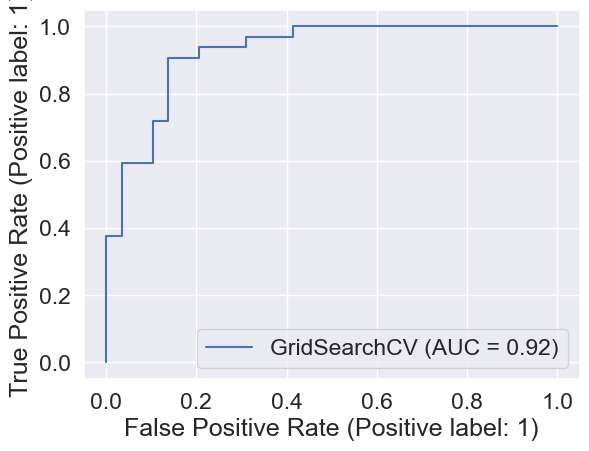

In [146]:
# Plot ROC curve and calculate & calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [147]:
# Confusion Matrix 
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

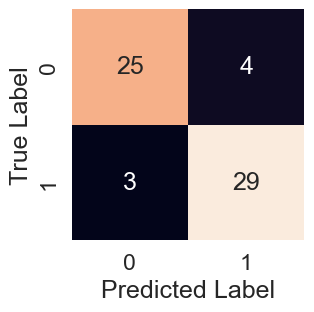

In [148]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds) :
   """
   Plots a nice looking confusion matrix using Seaborn's heatmap()
   """
fig, ax = plt.subplots(figsize = (3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                 annot = True, 
                 cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plot_conf_matrix(y_test, y_preds)

In [150]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using Cross-Validation 

In [151]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [152]:
# Create a new classifier with best parameters
clf = LogisticRegression(C =  0.23357214690901212, solver = "liblinear")

In [155]:
# Cross-validated accuracy 
cv_accuracy = cross_val_score(clf, 
                         X, 
                         y, 
                         cv = 5, 
                         scoring = "accuracy")
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [167]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

In [157]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                               X, 
                               y, 
                               cv = 5, 
                               scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [168]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [159]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                            X, 
                            y, 
                            cv = 5, 
                            scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [169]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [161]:
# Cross-validated f1_score
cv_f1_score = cross_val_score(clf, 
                              X, 
                              y, 
                              cv = 5,
                              scoring = "f1")
cv_f1_score

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [170]:
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8705403543192143

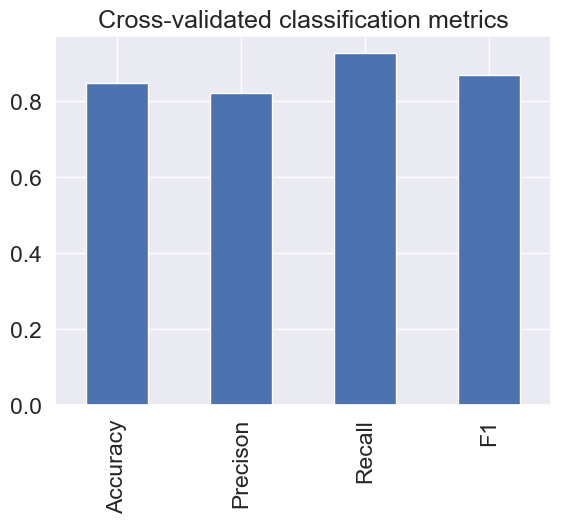

In [171]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_accuracy, 
                           "Precison" : cv_precision, 
                           "Recall" : cv_recall, 
                           "F1" : cv_f1_score}, 
                           index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", 
                      legend = False);

### Feature Importance 

Features importance is another asking . "which features contributed most to the outcomes of the model and how did they contributed ?"

Finding feature importance is defferent for each machine learning model.

**Let's find the feature importance for our LogisticRegression model**

In [173]:
# Fit an instance LogisticRegression
clf = LogisticRegression(C = 0.23357214690901212, solver = "liblinear")

clf.fit(X_train, y_train);

In [174]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [175]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

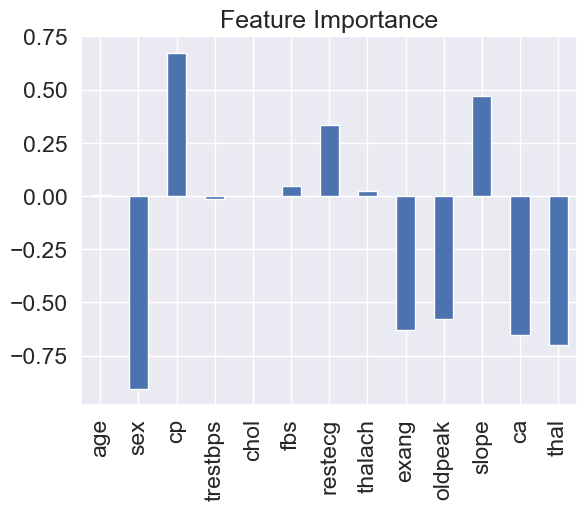

In [179]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [180]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [181]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
